### Exploracion con Dataframe limpio y categorias correctas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from IPython.display import HTML



## se puede descargar las bases de datos aqui:
* https://drive.google.com/drive/folders/1jlIswXpCUFqB10MDAEJXRTeSg_TENqd5?usp=drive_link
### archivos :
    # productos_total_categorizado_balanceado.parquet
    # sucursales.csv

In [2]:
def poner_fecha_string(df, date_string):
    date_obj = pd.to_datetime(date_string)
    df['fecha'] = date_obj


def agregar_sucursales(df, sucursales_df):
    for _, row in sucursales_df.iterrows():

        mascara = df['id_sucursal'] == row['id_sucursal']
        df.loc[mascara, 'sucursal_nombre'] = row['sucursales_nombre']
        df.loc[mascara, 'sucursal_tipo'] = row['sucursales_tipo']
        df.loc[mascara, 'sucursal_calle'] = row['sucursales_calle']
        df.loc[mascara, 'sucursal_latitud'] = row['sucursales_latitud']
        df.loc[mascara, 'sucursal_longitud'] = row['sucursales_longitud']
        df.loc[mascara, 'sucursal_barrio'] = row['sucursales_barrio']
        df.loc[mascara, 'sucursal_localidad'] = row['sucursales_localidad']
        df.loc[mascara, 'sucursal_provincia'] = row['sucursales_provincia']

    display(HTML(f"<span style='color: green;'> Datos de sucursales cargados exitosamente.</span>"))


def agregar_columnas_cambio_precio(df):
    df_ordenado = df.sort_values(by='fecha', ascending=True)
    df_X_producto_sucursal = df_ordenado.groupby(['id_producto', 'id_sucursal'])

    df['productos_diferencia_precio_fecha_anterior'] = df_X_producto_sucursal['productos_precio_lista'].diff()
    df['productos_diferencia_precio_fecha_anterior'] = df['productos_diferencia_precio_fecha_anterior'].fillna(0) # se reemplaza el NaN por 0 para evitar que cuente como un cambio de precio
    df['hubo_cambio_precio_fecha_anterior'] = df['productos_diferencia_precio_fecha_anterior'].ne(0) 


In [3]:
# Cargar de dataframe con las sucursales
sucursales_df = pd.DataFrame()


# ultimo archivo de sucursales subido 
sucursales_path = "datos/7_4_25-sepa_lunes/2025-04-07/sepa_1_comercio-sepa-10_2025-04-07_09-05-10/sucursales.csv" 

sucursales_df = pd.read_csv(sucursales_path, sep='|', header=0)

# Eliminar la última fila ya que contine una anotacion la 
# fecha de la utlima actualizacion del archivo
sucursales_df = sucursales_df.iloc[:-1, :]



In [4]:
# Leer el archivo Parquet con categorias creadas adecuadamente
dataset_path = "datos/parquets/productos_total_categorizado_balanceado.parquet"
df_parquet = pd.read_parquet(dataset_path)

In [5]:
# agregar sucursarles y columnas de cambios al dataframe parquet

agregar_sucursales(df_parquet, sucursales_df)
agregar_columnas_cambio_precio(df_parquet)

In [6]:
# eliminar filas con id_bandera nulo (pies de paginas de los datasets)
df_parquet = df_parquet[~df_parquet['id_bandera'].isna()]

# eliminar columnas conocidas como innecesarias
df_parquet.drop(columns=["productos_precio_unitario_promo2","productos_leyenda_promo2"], inplace=True)

In [7]:

tipos_de_datos = {
    "id_comercio": str, # texto, dado que no se hacen operaciones con este campo
    "id_bandera": np.int64,
    "id_sucursal": np.int64,
    "id_producto": np.int64,
    "productos_ean": np.int64,
    "productos_descripcion": str,
    "productos_cantidad_presentacion": np.float64,
    "productos_unidad_medida_presentacion": str,
    "productos_marca": 'category',
    "productos_precio_lista": np.float64,
    "productos_precio_referencia": np.float64,
    "productos_cantidad_referencia": np.float64,
    "productos_unidad_medida_referencia": str,
    "productos_precio_unitario_promo1": np.float64,
    "productos_leyenda_promo1": str,
    "fecha" : 'datetime64[ns]',
    "categoria_predicha" : 'category',
    "sucursal_nombre" : str,
    "sucursal_tipo" : 'category',
    "sucursal_calle" : 'category',
    "sucursal_latitud" : np.float64,
    "sucursal_longitud" : np.float64,
    "sucursal_barrio" : 'category',
    "sucursal_localidad" : 'category',
    "sucursal_provincia" : 'category',
    "productos_diferencia_precio_fecha_anterior" : np.float64,
    "hubo_cambio_precio_fecha_anterior" : bool,
}
df_parquet = df_parquet.astype(tipos_de_datos)
df_parquet.dtypes

id_comercio                                           object
id_bandera                                             int64
id_sucursal                                            int64
id_producto                                            int64
productos_ean                                          int64
productos_descripcion                                 object
productos_cantidad_presentacion                      float64
productos_unidad_medida_presentacion                  object
productos_marca                                     category
productos_precio_lista                               float64
productos_precio_referencia                          float64
productos_cantidad_referencia                        float64
productos_unidad_medida_referencia                    object
productos_precio_unitario_promo1                     float64
productos_leyenda_promo1                              object
fecha                                         datetime64[ns]
categoria_predicha      

In [13]:
df_parquet.head(10)

id_comercio  id_bandera  id_sucursal    id_producto  productos_ean  \
0          10           1           63  7790770601899              1   
1          10           3          711  7790070318398              1   
2          10           1           44  7622201808860              1   
3          10           2           62  7791293050089              1   
4          10           1            2  7791720018088              1   
5          10           2          130  7798151952981              1   
6          10           3          438  7791293045733              1   
7          10           2          290  7790070933638              1   
8          10           3          482  7798108349161              1   
9          10           2          272  7790990999868              1   

                               productos_descripcion  \
0         TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U   
1         FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS   
2        GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS   
3  ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...   
4             ANANA EN RODAJAS BULNEZ LATA X 825 GRS   
5            MANI TOSTADO CON CASCARA KING X 175 GRS   
6                   SHAMPOO CERAMIDAS SEDAL X 340 CC   
7     INFUSION A BASE DE CAFE ARLISTAN PET X 170 GRS   
8   ATUN AL NATURAL LOMITOS CARREFOUR LATA X 354 GRS   
9           LAVAVAJILLA LIMON ZORRO BOTELLA X 500 CC   

   productos_cantidad_presentacion productos_unidad_medida_presentacion  \
0                              1.0                                  UNI   
1                              1.0                                  UNI   
2                              1.0                                  UNI   
3                              1.0                                  UNI   
4                              1.0                                  UNI   
5                              1.0                                  UNI   
6                              1.0                                  UNI   
7                              1.0                                  UNI   
8                              1.0                                  UNI   
9                              1.0                                  UNI   

  productos_marca  productos_precio_lista  ...       sucursal_nombre  \
0        NOSOTRAS                  2709.0  ...         Caleta Olivia   
1       LUCCHETTI                  1339.0  ...    Álvarez Thomas 372   
2       TERRABUSI                   959.0  ...        Resistencia II   
3        TRESEMME                  3969.0  ...            Champagnat   
4          BULNEZ                  2990.0  ...         Vicente López   
5            KING                  1159.0  ...  Mar del Plata Centro   
6           SEDAL                  4090.0  ...       25 de Mayo 2650   
7        ARLISTAN                  7650.0  ...        Mendoza Bombal   
8       CARREFOUR                  5190.0  ...         Sullivan 1597   
9           ZORRO                  2099.0  ...       San Fernando II   

   sucursal_tipo                    sucursal_calle  sucursal_latitud  \
0   Hipermercado                   Humberto Beghin        -46.444906   
1   Autoservicio                Av. Álvarez Thomas        -34.581280   
2   Hipermercado                        Av. Ávalos        -27.438800   
3   Hipermercado          Panamericana Ramal Pilar        -34.449813   
4   Hipermercado                Av. del Libertador        -34.532302   
5   Supermercado                         Catamarca        -37.998923   
6   Supermercado                        25 de Mayo        -34.500302   
7   Supermercado                           Beltrán        -32.903094   
8   Autoservicio                Alejandro Sullivan        -34.657250   
9   Supermercado  Av. Pdte. Tte. Gral. J. D. Perón        -34.441795   

  sucursal_longitud sucursal_barrio               sucursal_localidad  \
0        -67.533789             NaN                       Santa Cruz   
1        -58.449050      Colegiales 

## ¿Cuáles son los productos que más cambian de precio según el día de la semana? 
1. separar/agrupar por fecha e id_producto (independiente de el tipo de sucursal, barrio, provincia, entre otros factores)
3. obtener la desviacion estandar de cada grupo 
4. ordenar y obtener el los productos con mayor valor

In [41]:
# df_parquet.groupby(['fecha', 'id_sucursal', 'id_producto'])['productos_precio_lista'].sum().sort_values(ascending=False).head(10)
p1_df = df_parquet.groupby(['fecha','id_producto'], as_index=False).agg({
    'productos_descripcion': 'first',
    'categoria_predicha':'first',
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})



In [15]:
p1_df.sort_values(by='conteo_cambio_fecha',ascending=False).head(10)

fecha    id_producto  \
22799 2025-04-02  7791250001529   
20362 2025-04-02  7790168904328   
20488 2025-04-02  7790240128673   
67625 2025-04-05  7790070760722   
68058 2025-04-05  7790189021011   
68111 2025-04-05  7790240042092   
25406 2025-04-02  7792319972231   
68059 2025-04-05  7790189021028   
25407 2025-04-02  7792319972248   
59643 2025-04-04  7798033337851   

                                  productos_descripcion   categoria_predicha  \
22799     ESPUMANTE EXTRA BRUT NAVARRO CORREAS X 750 CC  Alimentos y bebidas   
20362       VINO TINTO DULCE SELECTO COLON BOT X 750 CC  Alimentos y bebidas   
20488   VINO TINTO MALBEC RESERVA FOND DE CAVE X 750 CC  Alimentos y bebidas   
67625                 VINO TINTO MALBEC EMILIA X 750 CC  Alimentos y bebidas   
68058  VINO TINTO CABERNET SAUVIGNON ELEMENTOS X 750 CC  Alimentos y bebidas   
68111               VINO TINTO SYRAH ALMA MORA X 750 CC  Alimentos y bebidas   
25406         VINO TINTO COSECHA TARDIA NORTON X 750 CC  Alimentos y bebidas   
68059              VINO TINTO MALBEC ELEMENTOS X 750 CC  Alimentos y bebidas   
25407        VINO ROSADO COSECHA TARDIA NORTON X 750 CC  Alimentos y bebidas   
59643                   DULCE DE BATATA CLASSIC 500 GRS  Alimentos y bebidas   

       conteo_cambio_fecha  precio_lista_std  
22799                  564        164.845907  
20362                  559          0.000000  
20488                  559        181.630906  
67625                  557         31.123540  
68058                  557         17.270961  
68111                  554         32.299576  
25406                  553         46.524138  
68059                  553         17.344604  
25407                  552         46.482583  
59643                  550         72.377975

In [16]:
p1_df.sort_values(by='precio_lista_std',ascending=False).head(10)


fecha    id_producto                     productos_descripcion  \
111194 2025-04-07  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
15790  2025-04-01  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
47579  2025-04-03  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
31741  2025-04-02  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
79335  2025-04-05  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
95249  2025-04-06  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
63445  2025-04-04  8806086889957   MICROONDAS SAMSUNG MG23F3K3TAK BG NEGRO   
91352  2025-04-06  7798013732744      COCINA ESCORIAL 51CM CANDOR NEGRA GN   
79336  2025-04-05  8806086889964  MICROONDAS SAMSUNG MG23F3K3TAS BG SILVER   
63446  2025-04-04  8806086889964  MICROONDAS SAMSUNG MG23F3K3TAS BG SILVER   

       categoria_predicha  conteo_cambio_fecha  precio_lista_std  
111194  Electrodomesticos                    0      95122.259926  
15790   Electrodomesticos                    0      95122.259926  
47579   Electrodomesticos                    0      95122.259926  
31741   Electrodomesticos                    0      95122.259926  
79335   Electrodomesticos                    0      95122.259926  
95249   Electrodomesticos                    0      95122.259926  
63445   Electrodomesticos                    0      95122.259926  
91352   Higiene y cuidado                    0      75936.837327  
79336   Electrodomesticos                    0      75207.580735  
63446   Electrodomesticos                    0      75207.580735

## visualizacion dia de los productos con mas cambios

In [39]:
hex_colors = [
    '#050a30',  # azul oscuro
    '#233dff',  # azul eléctrico
    '#353959',  # gris azulado
    '#5cb6f9',  # celeste
    '#7d8096',  # gris medio
    '#b6bffd',  # azul lavanda
    '#d2e8fb',  # celeste claro
]
import random
def color_func(*args, **kwargs):
    return random.choice(hex_colors)

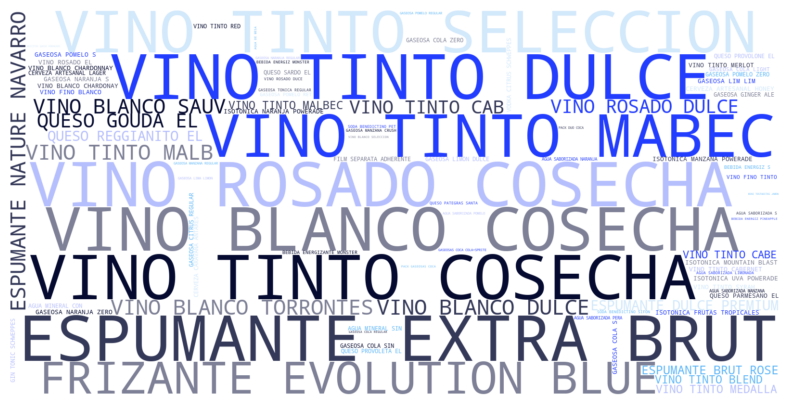

In [42]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-02')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# limpiar la cadena de texto
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-02']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800, background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

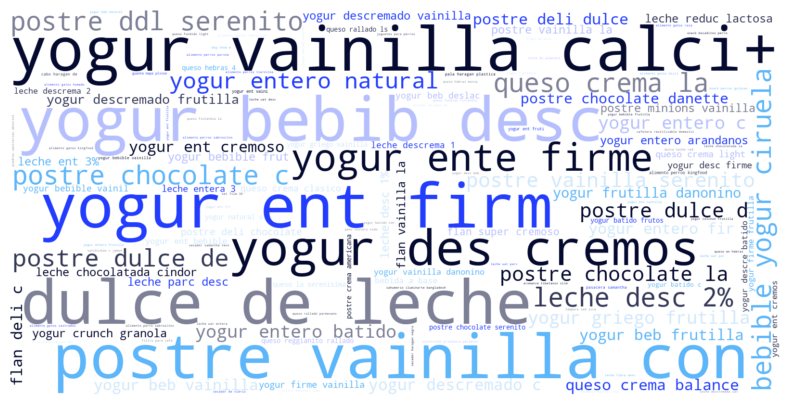

In [55]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-03')

nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-03']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800,background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

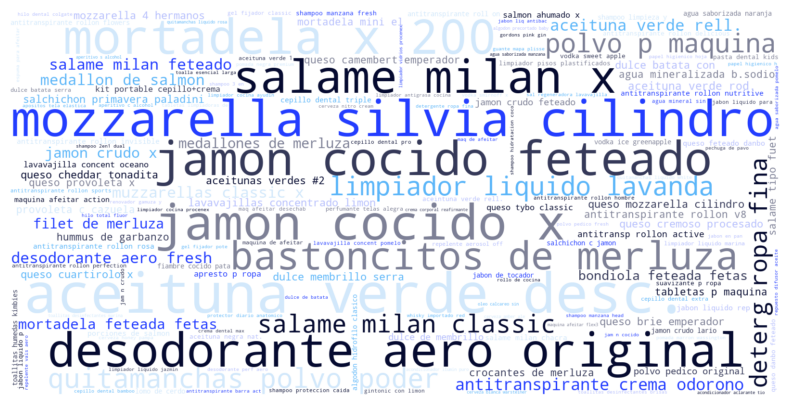

In [54]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-04')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-04']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800,background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

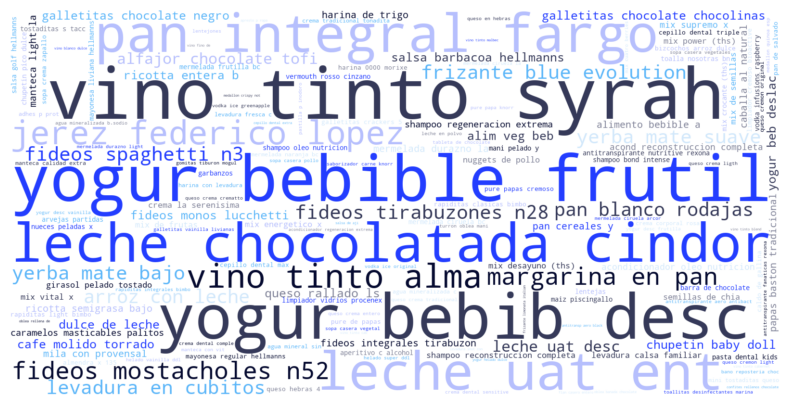

In [53]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-05')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-05']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800,background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

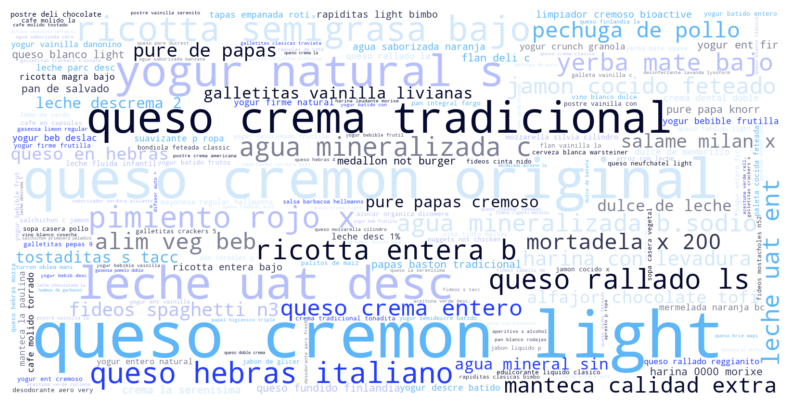

In [52]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-06')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-06']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()


# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800,background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)


plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()

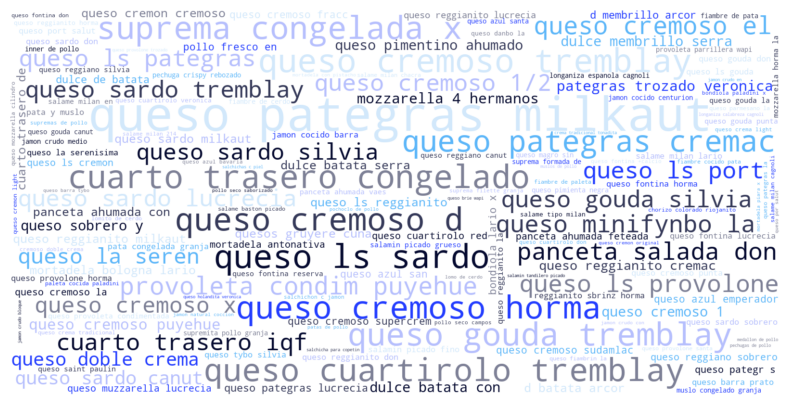

In [51]:
# nube de palabras para visualizar las categorias que mas cambian (fecha: '2025-04-07')
nube_df = p1_df.copy()

nube_df['fecha'] = pd.to_datetime(nube_df['fecha'])
nube_df = nube_df[nube_df['fecha'] == '2025-04-07']
nube_df = nube_df.groupby('productos_descripcion')['conteo_cambio_fecha'].sum().sort_values(ascending=False).head(200)
nube_df.index = nube_df.index.str.split().str[:3].str.join(' ') #recortar cada nombre a 3 palabras
conteos_como_frecuencias = nube_df.to_dict()

# WordCloud con generate_from_frequencies
nube = WordCloud(width=1600, height=800,background_color='white', color_func=color_func).generate_from_frequencies(conteos_como_frecuencias)

plt.figure(figsize=(10, 5))
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.show()


In [61]:
p1_df[p1_df['fecha']=='2025-04-07'].sort_values(by='conteo_cambio_fecha',ascending=False).head(20)


fecha    id_producto  \
96878 2025-04-07  2509005000001   
96686 2025-04-07  2507513000001   
96908 2025-04-07  2509076000009   
96400 2025-04-07  2506058000002   
96448 2025-04-07  2506144000008   
96708 2025-04-07  2507573000003   
96301 2025-04-07  2505266000002   
96306 2025-04-07  2505271000004   
96712 2025-04-07  2507579000007   
96910 2025-04-07  2509085000007   
96909 2025-04-07  2509084000008   
96961 2025-04-07  2509268000008   
96871 2025-04-07  2508987000009   
96385 2025-04-07  2506013000009   
96959 2025-04-07  2509266000000   
96396 2025-04-07  2506051000009   
96320 2025-04-07  2505545000006   
96402 2025-04-07  2506060000007   
96563 2025-04-07  2506687000008   
96546 2025-04-07  2506611000005   

                                   productos_descripcion categoria_predicha  \
96878                     queso cremoso 1 8 classic x kg  Electrodomesticos   
96686                     queso pategras milkaut trozado  Electrodomesticos   
96908                queso cremoso tremblay trozado x kg  Electrodomesticos   
96400                    queso ls sardo sin lactosa x kg  Electrodomesticos   
96448          queso port salut ligth fracc puyehue x kg  Electrodomesticos   
96708                           cuarto trasero congelado  Electrodomesticos   
96301                    queso cremoso horma cremac x kg  Electrodomesticos   
96306                     queso cuartirolo tremblay x kg  Electrodomesticos   
96712                             suprema congelada x kg  Electrodomesticos   
96910             queso port salut tremblay trozado x kg  Electrodomesticos   
96909                  queso gouda tremblay trozado x kg  Electrodomesticos   
96961                      queso cremoso d 70 horma x kg  Electrodomesticos   
96871                 queso pategras cremac trozado x kg  Electrodomesticos   
96385                     provoleta condim puyehue x kg.  Electrodomesticos   
96959                 queso cremoso el puente horma x kg  Electrodomesticos   
96396    queso port salut la seren sima sin lactosa x kg  Electrodomesticos   
96320      queso port salut p.del agua light horma x kg.  Electrodomesticos   
96402                queso ls provolone sin lactosa x kg  Electrodomesticos   
96563                       panceta salada don jose x kg  Electrodomesticos   
96546  queso minifynbo la serenisima sin lact fracc x...  Electrodomesticos   

       conteo_cambio_fecha  precio_lista_std  
96878                  439        132.803976  
96686                  415        482.180321  
96908                  161          0.000000  
96400                  160       2889.474426  
96448                  159        289.980769  
96708                  155         90.791888  
96301                  152        964.349453  
96306                  152        315.230989  
96712                  151        413.580396  
96910                  150        474.964038  
96909                  149        675.120113  
96961                  149        330.821238  
96871                  149       1377.659074  
96385                  148        471.049331  
96959                  148        433.369116  
96396                  147       1260.558450  
96320                  142        243.135095  
96402                  142       3435.819781  
96563                  142        954.206675  
96546                  141       1855.554087

## visualizacion por catergoria

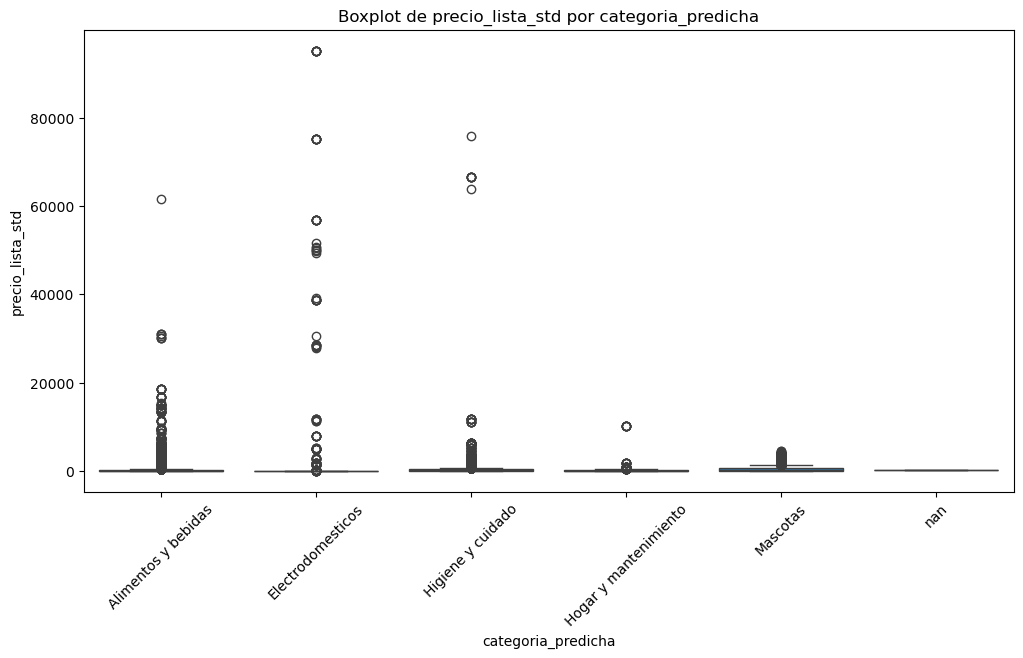

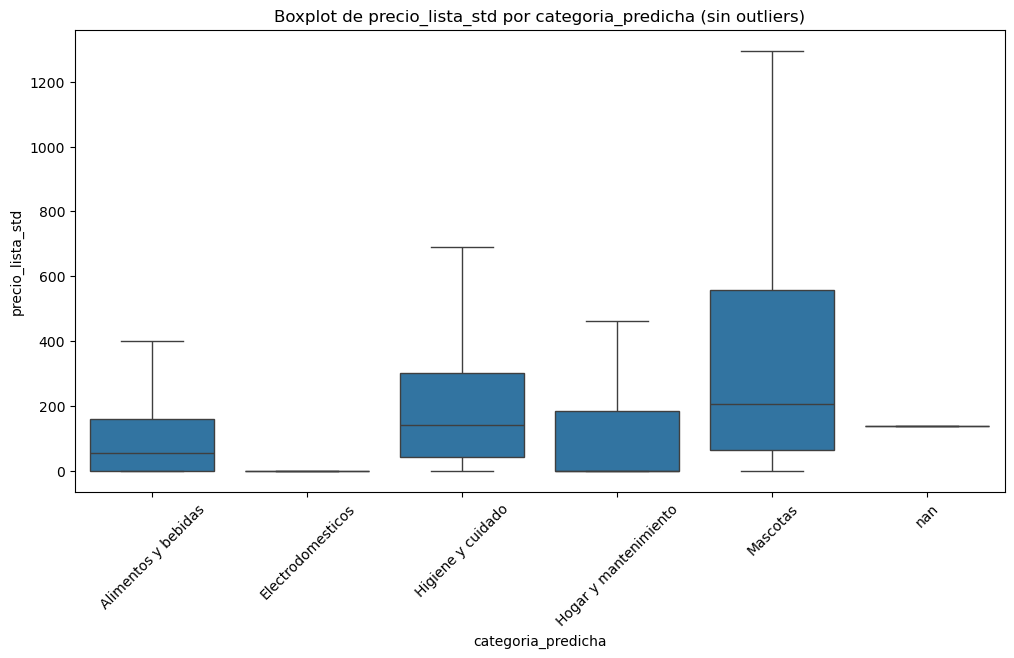

/tmp/ipykernel_272029/2227177917.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precio_lista_std_por_categoria = p1_df.groupby('categoria_predicha')['precio_lista_std'].sum().reset_index()


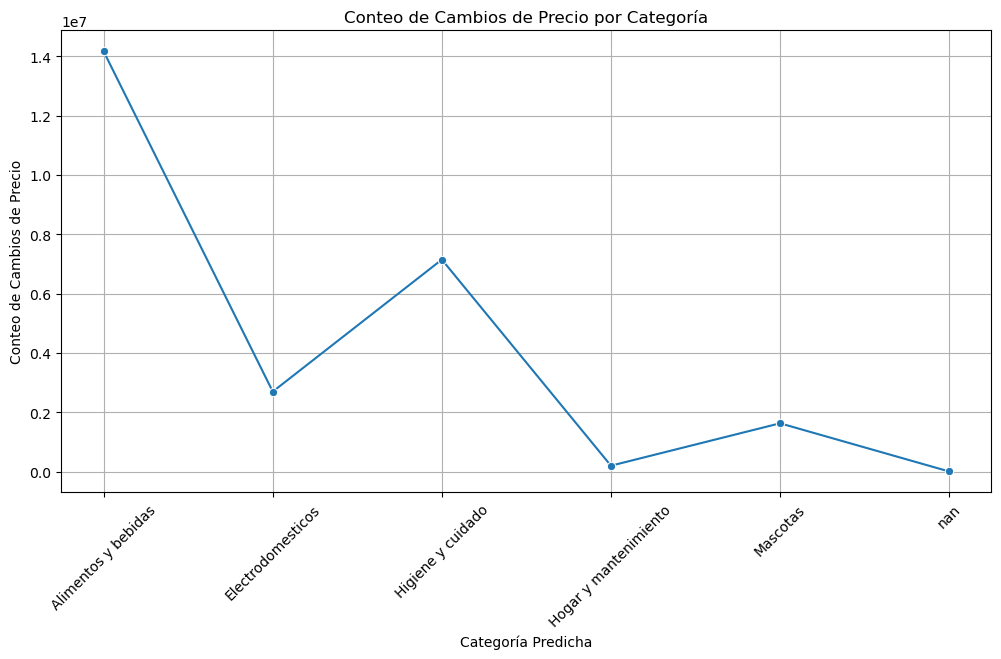

In [20]:
# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='precio_lista_std', data=p1_df)
plt.title('Boxplot de precio_lista_std por categoria_predicha')
plt.xlabel('categoria_predicha')
plt.ylabel('precio_lista_std')
plt.xticks(rotation=45)
plt.show()

# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='precio_lista_std', data=p1_df, showfliers=False)
plt.title('Boxplot de precio_lista_std por categoria_predicha (sin outliers)')
plt.xlabel('categoria_predicha')
plt.ylabel('precio_lista_std')
plt.xticks(rotation=45)
plt.show()

precio_lista_std_por_categoria = p1_df.groupby('categoria_predicha')['precio_lista_std'].sum().reset_index()
precio_lista_std_por_categoria.sort_values(by='precio_lista_std', ascending=False, inplace=True)

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=precio_lista_std_por_categoria, x='categoria_predicha', y='precio_lista_std', marker='o')
plt.title('Conteo de Cambios de Precio por Categoría')
plt.xlabel('Categoría Predicha')
plt.ylabel('Conteo de Cambios de Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/tmp/ipykernel_367754/4216511653.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo_cambio_por_categoria = p1_df.groupby('categoria_predicha')['conteo_cambio_fecha'].sum().reset_index()


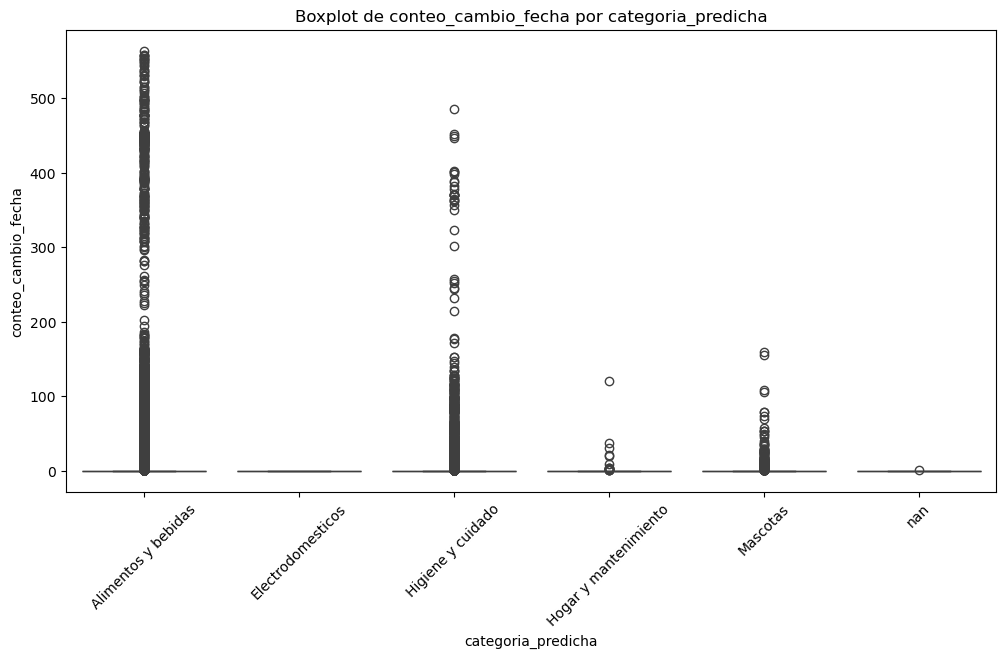

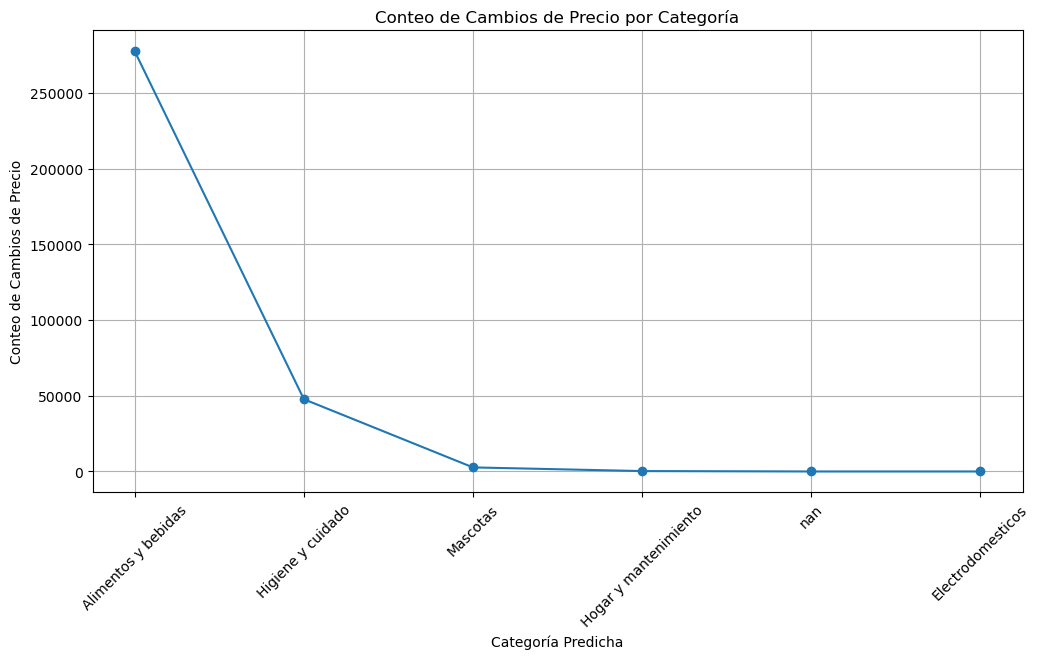

In [45]:
# Agrupar por 'categoria_predicha' y sumar 'conteo_cambio_fecha'
conteo_cambio_por_categoria = p1_df.groupby('categoria_predicha')['conteo_cambio_fecha'].sum().reset_index()
conteo_cambio_por_categoria.sort_values(by='conteo_cambio_fecha', ascending=False, inplace=True)

# Boxplot por categoria_predicha
plt.figure(figsize=(12, 6))
sns.boxplot(x='categoria_predicha', y='conteo_cambio_fecha', data=p1_df)
plt.title('Boxplot de conteo_cambio_fecha por categoria_predicha')
plt.xlabel('categoria_predicha')
plt.ylabel('conteo_cambio_fecha')
plt.xticks(rotation=45)
plt.show()

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
plt.plot(conteo_cambio_por_categoria['categoria_predicha'], conteo_cambio_por_categoria['conteo_cambio_fecha'], marker='o')
plt.title('Conteo de Cambios de Precio por Categoría')
plt.xlabel('Categoría Predicha')
plt.ylabel('Conteo de Cambios de Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



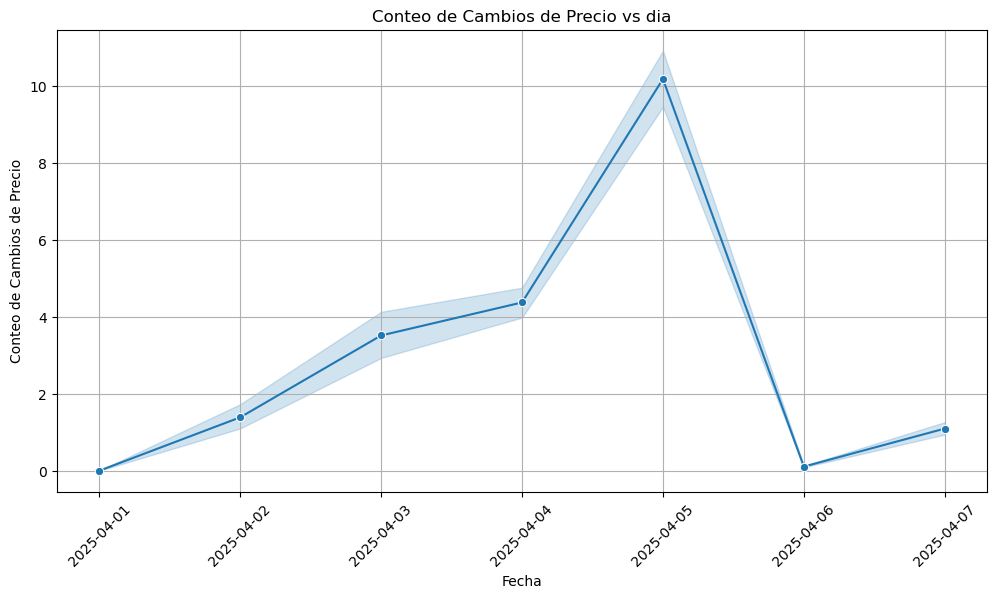

In [70]:

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=p1_df, x='fecha', y='conteo_cambio_fecha', marker='o')
plt.title('Conteo de Cambios de Precio vs dia')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Cambios de Precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

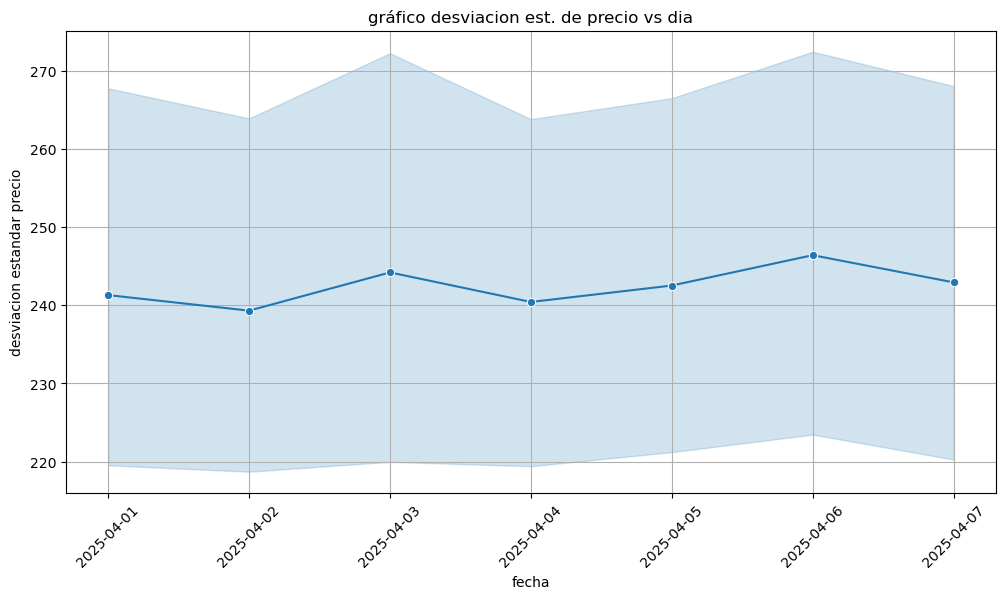

In [24]:

# Crear el gráfico de línea
plt.figure(figsize=(12, 6))
sns.lineplot(data=p1_df, x='fecha', y='precio_lista_std', marker='o')
plt.title('gráfico desviacion est. de precio vs dia')
plt.xlabel('fecha')
plt.ylabel('desviacion estandar precio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [74]:
p1_df.groupby('fecha')['precio_lista_std'].mean().head(10)

fecha
2025-04-01    241.303449
2025-04-02    239.313697
2025-04-03    244.203335
2025-04-04    240.423266
2025-04-05    242.526124
2025-04-06    246.407070
2025-04-07    242.929906
Name: precio_lista_std, dtype: float64

In [101]:
p1_df = df_parquet.groupby(['categoria_predicha'], as_index=False).agg({
    # 'productos_descripcion': 'first',
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})

In [102]:
p1_df.sort_values(by='conteo_cambio_fecha',ascending=False).head(10)


categoria_predicha  conteo_cambio_fecha  precio_lista_std
1      Electrodomesticos               272564      84304.892026
0    Alimentos y bebidas                45675       5365.367265
4  Limpieza y perfumería                 3949       3352.411336
2               Farmacia                 2619      10362.998990
5               Mascotas                 2035       8601.928864
6         Textil y Hogar                  970       3906.630303
3             Ferreteria                  234     406516.235752

In [103]:
p1_df.sort_values(by='precio_lista_std',ascending=False).head(10)


categoria_predicha  conteo_cambio_fecha  precio_lista_std
3             Ferreteria                  234     406516.235752
1      Electrodomesticos               272564      84304.892026
2               Farmacia                 2619      10362.998990
5               Mascotas                 2035       8601.928864
0    Alimentos y bebidas                45675       5365.367265
6         Textil y Hogar                  970       3906.630303
4  Limpieza y perfumería                 3949       3352.411336

## ¿Existe un patrón de precios por región? (ejemplo: regiones o grupos de provincias del país con precios muy elevados) Elegir alguna de las

1. agrupar por barrios y por fechas 
2. obtener las dispersion por cada grupo

In [26]:
# df_parquet.groupby(['fecha', 'id_sucursal', 'id_producto'])['productos_precio_lista'].sum().sort_values(ascending=False).head(10)
p2_df = df_parquet.groupby(['sucursal_calle'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})

/tmp/ipykernel_272029/2227060038.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  p2_df = df_parquet.groupby(['sucursal_calle'], as_index=False).agg({


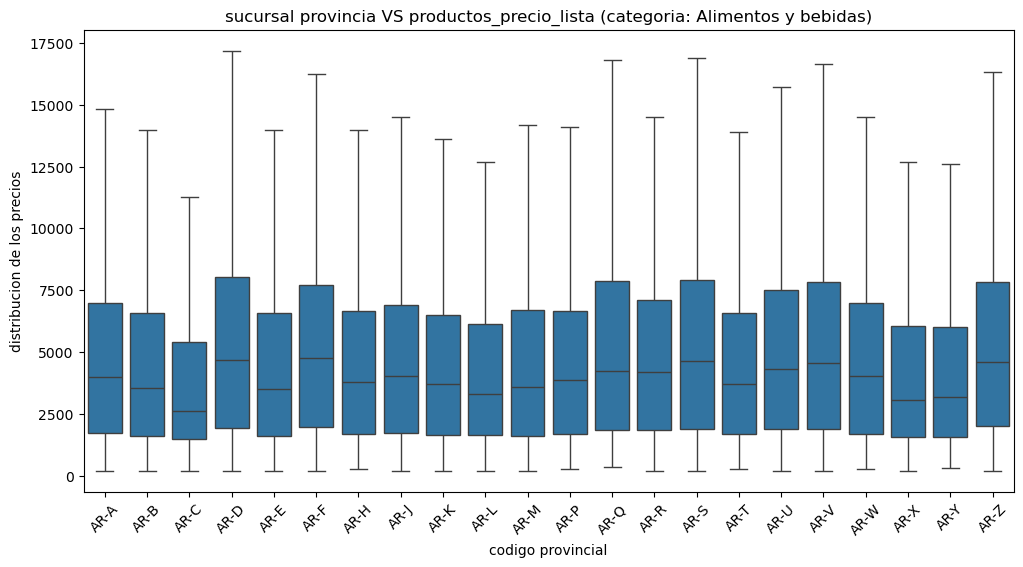

In [85]:

df_parquet_alimentos = df_parquet[df_parquet['categoria_predicha'] == 'Alimentos y bebidas']

plt.figure(figsize=(12, 6))
sns.boxplot(x='sucursal_provincia', y='productos_precio_lista', data=df_parquet_alimentos, showfliers=False)
plt.title('sucursal provincia VS productos_precio_lista (categoria: Alimentos y bebidas)') 
plt.xlabel('codigo provincial')
plt.ylabel('distribucion de los precios')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_88308/1559469405.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_parquet_alimentos_agrupado = df_parquet_alimentos.groupby(['sucursal_provincia'], as_index=False).agg({


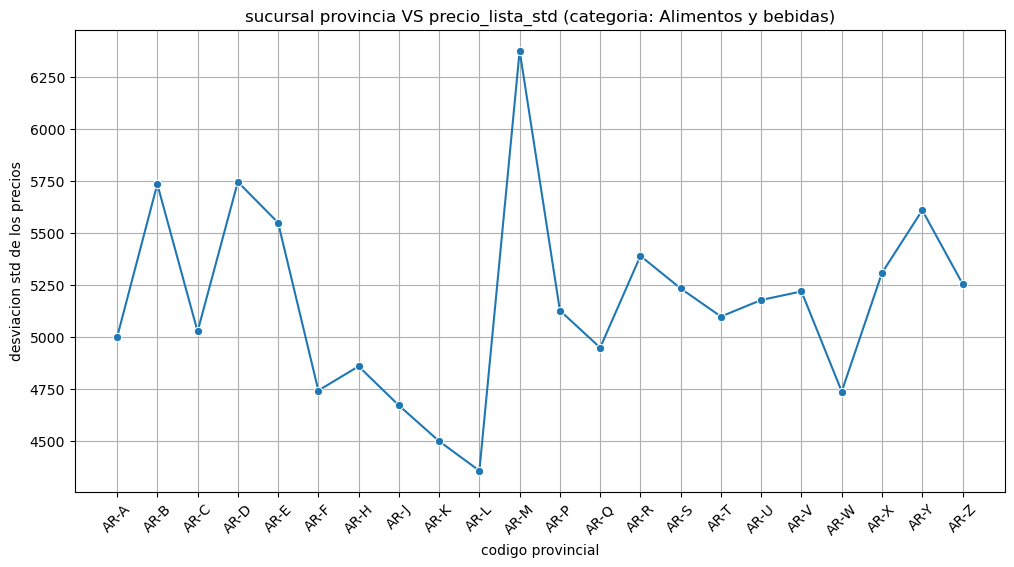

   sucursal_provincia  precio_lista_std
10               AR-M       6376.572294
3                AR-D       5746.291661
1                AR-B       5735.661692
20               AR-Y       5610.088401
4                AR-E       5550.225791
13               AR-R       5390.640689
19               AR-X       5308.750179
21               AR-Z       5257.075521
14               AR-S       5234.013471
17               AR-V       5219.857070


In [90]:
df_parquet_alimentos_agrupado = df_parquet_alimentos.groupby(['sucursal_provincia'], as_index=False).agg({
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
})

plt.figure(figsize=(12, 6))
sns.lineplot(x='sucursal_provincia', y='precio_lista_std', data=df_parquet_alimentos_agrupado, marker='o')
plt.title('sucursal provincia VS precio_lista_std (categoria: Alimentos y bebidas)') 
plt.xlabel('codigo provincial')
plt.ylabel('desviacion std de los precios')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print(df_parquet_alimentos_agrupado.sort_values(by='precio_lista_std',ascending=False).head(10))

/tmp/ipykernel_88308/1699355224.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_parquet_agrupado = df_parquet.groupby(['sucursal_provincia'], as_index=False).agg({


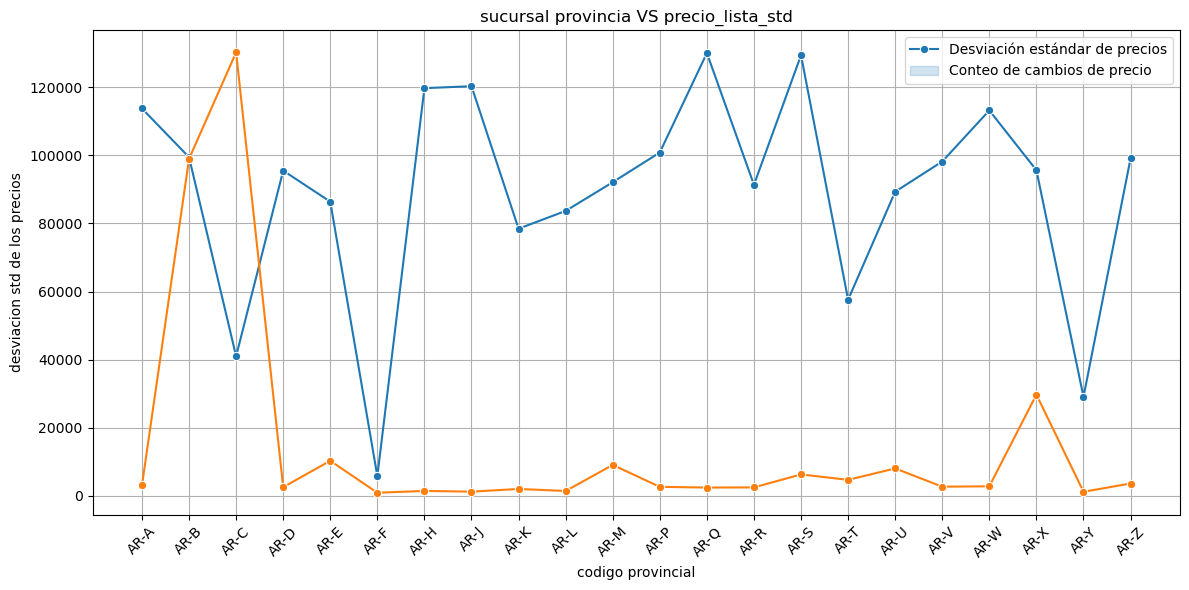

   sucursal_provincia  precio_lista_std  conteo_cambio_fecha
12               AR-Q     130025.202541                 2446
14               AR-S     129383.528707                 6301
7                AR-J     120286.110951                 1242
6                AR-H     119710.763027                 1450
0                AR-A     113739.574721                 3075
18               AR-W     113176.170220                 2813
11               AR-P     100816.455812                 2660
1                AR-B      99434.507852                98932
21               AR-Z      99099.679892                 3630
17               AR-V      98176.526589                 2700


In [97]:
df_parquet_agrupado = df_parquet.groupby(['sucursal_provincia'], as_index=False).agg({
    'productos_precio_lista': 'std',
    'hubo_cambio_precio_fecha_anterior': 'sum',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
})

plt.figure(figsize=(12, 6))
sns.lineplot(x='sucursal_provincia', y='precio_lista_std', data=df_parquet_agrupado, marker='o')
sns.lineplot(x='sucursal_provincia', y='conteo_cambio_fecha', data=df_parquet_agrupado, marker='o')
plt.title('sucursal provincia VS precio_lista_std') 
plt.xlabel('codigo provincial')
plt.ylabel('desviacion std de los precios')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(['Desviación estándar de precios', 'Conteo de cambios de precio'])
plt.tight_layout()
plt.show()

print(df_parquet_agrupado.sort_values(by='precio_lista_std',ascending=False).head(10))

In [191]:
df_parquet.groupby(['sucursal_calle'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista' ,ascending=False).head(10)

sucursal_calle  hubo_cambio_precio_fecha_anterior  \
259            Jerónimo Salguero                               1609   
58              Av. Constitución                               1273   
109                Av. O'Higgins                               1907   
34   Av. Acceso Este Lateral Sur                               1476   
339                     Ruta 202                               1521   
179        Camino Gral. Belgrano                               2205   
67                 Av. Don Bosco                               1389   
40              Av. Arturo Illia                               1548   
180            Camino de Cintura                               1421   
136           Av. del Libertador                               3671   

     productos_precio_lista  cantidad_productos  
259           192686.800011               81183  
58            186127.328521               77791  
109           175240.350135               78051  
34            174107.189462               75393  
339           171869.785761               77767  
179           167180.057845              111636  
67            165099.429053               71635  
40            163716.665419               78311  
180           157508.055424               71753  
136           155340.270587              184096

In [192]:
df_parquet.groupby(['sucursal_localidad'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista' ,ascending=False).head(10)

sucursal_localidad  hubo_cambio_precio_fecha_anterior  \
121        Villa Urquiza                               1892   
113        Vicente López                               2687   
48       Jardin Espinoza                               1907   
43            Guaymallen                               1476   
97             San Justo                               1389   
60   Malvinas Argentinas                               1548   
69          Monte Grande                               1421   
99            San Martín                               2213   
3                Adrogué                               1955   
70                Moreno                               1501   

     productos_precio_lista  cantidad_productos  
121           184547.943478               78100  
113           178499.344718              138851  
48            175240.350135               78051  
43            174107.189462               75393  
97            165099.429053               71635  
60            163716.665419               78311  
69            157508.055424               71753  
99            145059.695483              112204  
3             139994.702662               99266  
70            139905.770797               76504

In [193]:
df_parquet.groupby(['sucursal_tipo'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
    'id_producto': 'count'  
}).rename(columns={
    'id_producto': 'cantidad_productos',
}).sort_values(by='productos_precio_lista', ascending=False).head(10)

sucursal_tipo  hubo_cambio_precio_fecha_anterior  productos_precio_lista  \
1  Hipermercado                             110550           129975.099492   
2  Supermercado                              83970            37264.858466   
0  Autoservicio                             133526             4158.125980   

   cantidad_productos  
1             5514530  
2             4003444  
0             6039342

### verificacion con estadistica inferencial

In [12]:
from scipy.stats import chi2_contingency

In [12]:
p2_df = df_parquet.copy()

p2_df['hubo_cambio_precio_fecha_anterior'] = p2_df['hubo_cambio_precio_fecha_anterior'].astype('category')

p2_df.loc[:,['hubo_cambio_precio_fecha_anterior', 'sucursal_tipo', 'sucursal_localidad', 'sucursal_barrio']]

hubo_cambio_precio_fecha_anterior sucursal_tipo  \
0                                    False  Hipermercado   
1                                    False  Autoservicio   
2                                    False  Hipermercado   
3                                    False  Hipermercado   
4                                    False  Hipermercado   
...                                    ...           ...   
15557318                             False  Supermercado   
15557319                             False  Hipermercado   
15557320                             False  Hipermercado   
15557321                             False  Hipermercado   
15557322                             False  Autoservicio   

                       sucursal_localidad sucursal_barrio  
0                              Santa Cruz             NaN  
1         Ciudad Autónoma de Buenos Aires      Colegiales  
2                             Resistencia             NaN  
3                                   Pilar             NaN  
4                           Vicente López             NaN  
...                                   ...             ...  
15557318  Ciudad Autónoma de Buenos Aires   Villa Urquiza  
15557319                           Zárate             NaN  
15557320                            Salta             NaN  
15557321  Ciudad Autónoma de Buenos Aires             NaN  
15557322  Ciudad Autónoma de Buenos Aires        Floresta  

[15557316 rows x 4 columns]

In [105]:
# sucursal_tipo vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_tipo'], p2_df['hubo_cambio_precio_fecha_anterior'])
# Mostrar las frecuencias esperadas para determinar si la frecuencia esperada es mayor a 5 
chi2, p, dof, expected = chi2_contingency(contingency)
print(pd.DataFrame(expected, index=contingency.index, columns=contingency.columns))


print(f"\nResultado Test Chi-Cuadrado (sucursal_tipo vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.4f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.")

hubo_cambio_precio_fecha_anterior         False           True
sucursal_tipo                                                 
Autoservicio                       5.911995e+06  127347.287008
Hipermercado                       5.398249e+06  116280.951572
Supermercado                       3.919026e+06   84417.761420

Resultado Test Chi-Cuadrado (sucursal_tipo vs hubo_cambio_precio_fecha_anterior): chi2=597.20, p=0.0000
Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_tipo y hubo_cambio_precio_fecha_anterior.


In [ ]:
# sucursal_localidad vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_localidad'], p2_df['hubo_cambio_precio_fecha_anterior'])
chi2, p, dof, expected = chi2_contingency(contingency)

# Verificar si hay alguna frecuencia esperada < 5
hay_valores_menores_a_5 = (expected < 5).any()
print("¿Hay alguna frecuencia esperada menor a 5?:", hay_valores_menores_a_5)

print(f"\nResultado Test Chi-Cuadrado (sucursal_localidad vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.4f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_localidad y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_localidad y hubo_cambio_precio_fecha_anterior.")

hubo_cambio_precio_fecha_anterior         False         True
sucursal_localidad                                          
3 de Febrero                       16271.503770   350.496230
Acassuso                           43795.620693   943.379307
Adolfo Sordeaux                    16341.006643   351.993357
Adrogué                            97172.848827  2093.151173
Almirante Brown                    17459.905020   376.094980
...                                         ...          ...
Villa Mercedes                     66919.520467  1441.479533
Villa Urquiza                      76453.161137  1646.838863
Wilde                              18023.759319   388.240681
Yerba Buena                        51410.590481  1107.409519
Zárate                             68207.770916  1469.229084

[125 rows x 2 columns]
¿Hay alguna frecuencia esperada menor a 5?: False

Resultado Test Chi-Cuadrado (sucursal_localidad vs hubo_cambio_precio_fecha_anterior): chi2=16879.00, p=0.0000
Rechazamos la hipótes

In [109]:
# sucursal_barrio vs hubo_cambio_precio_fecha_anterior

contingency = pd.crosstab(p2_df['sucursal_barrio'], p2_df['hubo_cambio_precio_fecha_anterior'])
chi2, p, dof, expected = chi2_contingency(contingency)

# Verificar si hay alguna frecuencia esperada < 5
hay_valores_menores_a_5 = (expected < 5).any()
print("¿Hay alguna frecuencia esperada menor a 5?:", hay_valores_menores_a_5)

print(f"\nResultado Test Chi-Cuadrado (sucursal_barrio vs hubo_cambio_precio_fecha_anterior): chi2={chi2:.2f}, p={p:.16f}")
if p <= 0.05:
    print("Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.")

¿Hay alguna frecuencia esperada menor a 5?: False

Resultado Test Chi-Cuadrado (sucursal_barrio vs hubo_cambio_precio_fecha_anterior): chi2=3126.96, p=0.0000000000000000
Rechazamos la hipótesis nula: hay una relación significativa entre sucursal_barrio y hubo_cambio_precio_fecha_anterior.


## Se concluye que efectivamente hay relacion entre estas variables

se procede a observar como es esta relacion


In [51]:
p2_df.head(10)

id_comercio  id_bandera  id_sucursal    id_producto  productos_ean  \
0          10           1           63  7790770601899              1   
1          10           3          711  7790070318398              1   
2          10           1           44  7622201808860              1   
3          10           2           62  7791293050089              1   
4          10           1            2  7791720018088              1   
5          10           2          130  7798151952981              1   
6          10           3          438  7791293045733              1   
7          10           2          290  7790070933638              1   
8          10           3          482  7798108349161              1   
9          10           2          272  7790990999868              1   

                               productos_descripcion  \
0         TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U   
1         FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS   
2        GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS   
3  ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...   
4             ANANA EN RODAJAS BULNEZ LATA X 825 GRS   
5            MANI TOSTADO CON CASCARA KING X 175 GRS   
6                   SHAMPOO CERAMIDAS SEDAL X 340 CC   
7     INFUSION A BASE DE CAFE ARLISTAN PET X 170 GRS   
8   ATUN AL NATURAL LOMITOS CARREFOUR LATA X 354 GRS   
9           LAVAVAJILLA LIMON ZORRO BOTELLA X 500 CC   

   productos_cantidad_presentacion productos_unidad_medida_presentacion  \
0                              1.0                                  UNI   
1                              1.0                                  UNI   
2                              1.0                                  UNI   
3                              1.0                                  UNI   
4                              1.0                                  UNI   
5                              1.0                                  UNI   
6                              1.0                                  UNI   
7                              1.0                                  UNI   
8                              1.0                                  UNI   
9                              1.0                                  UNI   

  productos_marca  productos_precio_lista  ...       sucursal_nombre  \
0        NOSOTRAS                  2709.0  ...         Caleta Olivia   
1       LUCCHETTI                  1339.0  ...    Álvarez Thomas 372   
2       TERRABUSI                   959.0  ...        Resistencia II   
3        TRESEMME                  3969.0  ...            Champagnat   
4          BULNEZ                  2990.0  ...         Vicente López   
5            KING                  1159.0  ...  Mar del Plata Centro   
6           SEDAL                  4090.0  ...       25 de Mayo 2650   
7        ARLISTAN                  7650.0  ...        Mendoza Bombal   
8       CARREFOUR                  5190.0  ...         Sullivan 1597   
9           ZORRO                  2099.0  ...       San Fernando II   

   sucursal_tipo                    sucursal_calle  sucursal_latitud  \
0   Hipermercado                   Humberto Beghin        -46.444906   
1   Autoservicio                Av. Álvarez Thomas        -34.581280   
2   Hipermercado                        Av. Ávalos        -27.438800   
3   Hipermercado          Panamericana Ramal Pilar        -34.449813   
4   Hipermercado                Av. del Libertador        -34.532302   
5   Supermercado                         Catamarca        -37.998923   
6   Supermercado                        25 de Mayo        -34.500302   
7   Supermercado                           Beltrán        -32.903094   
8   Autoservicio                Alejandro Sullivan        -34.657250   
9   Supermercado  Av. Pdte. Tte. Gral. J. D. Perón        -34.441795   

  sucursal_longitud sucursal_barrio               sucursal_localidad  \
0        -67.533789             NaN                       Santa Cruz   
1        -58.449050      Colegiales 

/tmp/ipykernel_272029/3330077077.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = pd.pivot_table(


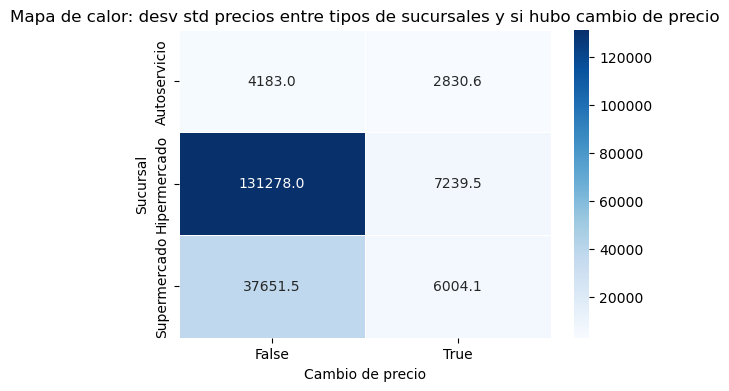

In [55]:
tabla = pd.pivot_table(
    p2_df,
    values='productos_precio_lista',              # variable de interés (numérica)
    index='sucursal_tipo',                      # variable para filas
    columns='hubo_cambio_precio_fecha_anterior',          # variable para columnas
    aggfunc='std',                         # qué hacer con los datos
    fill_value=0
)

plt.figure(figsize=(6, 4))
sns.heatmap(tabla, annot=True, fmt='.1f', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Mapa de calor: desv std precios entre tipos de sucursales y si hubo cambio de precio')
plt.xlabel('Cambio de precio')
plt.ylabel('Sucursal')
# plt.tight_layout()
plt.show()


In [60]:
p2_df['sucursal_barrio'].unique()

[NaN, 'Colegiales', 'Quilmes', 'La Boca', 'Chacarita', ..., 'Villa Lugano', 'Haedo', 'Gral Paz', 'Burzaco', 'Monte castro']
Length: 76
Categories (75, object): ['Agronomia', 'Almagro', 'Atalaya', 'Balvanera', ..., 'Villa Urquiza', 'Villa del Parque', 'Villa luro', 'Wilde']

/tmp/ipykernel_367754/2615287138.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = pd.pivot_table(


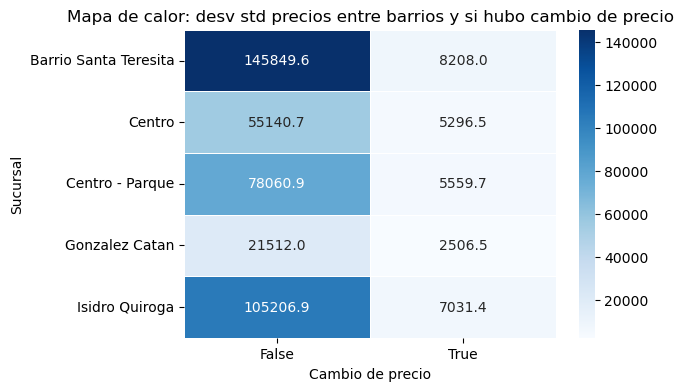

In [23]:

tabla = pd.pivot_table(
    p2_df,
    values='productos_precio_lista',              # variable de interés (numérica)
    index='sucursal_barrio',                      # variable para filas
    columns='hubo_cambio_precio_fecha_anterior',          # variable para columnas
    aggfunc='std',                         # qué hacer con los datos
    fill_value=0
)


tabla['total_std'] = tabla.sum(axis=1)

# Filtrar las sucursales con total_std mayor a cierto umbral
tabla_filtrada = tabla[tabla['total_std'] > 20000]  # ajustá el valor a tu criterio

# Remover la columna auxiliar
tabla_filtrada = tabla_filtrada.drop(columns='total_std')

plt.figure(figsize=(6, 4))
sns.heatmap(tabla_filtrada, annot=True, fmt='.1f', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Mapa de calor: desv std precios entre barrios y si hubo cambio de precio')
plt.xlabel('Cambio de precio')
plt.ylabel('Sucursal')
# plt.tight_layout()
plt.show() 

/tmp/ipykernel_367754/1577746039.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  tabla = pd.pivot_table(


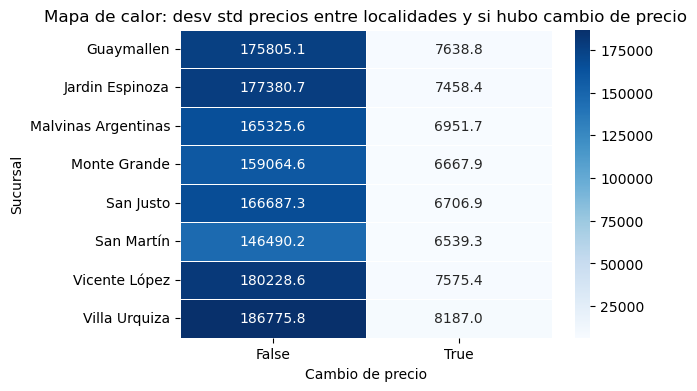

In [22]:

tabla = pd.pivot_table(
    p2_df,
    values='productos_precio_lista',              # variable de interés (numérica)
    index='sucursal_localidad',                      # variable para filas
    columns='hubo_cambio_precio_fecha_anterior',          # variable para columnas
    aggfunc='std',                         # qué hacer con los datos
    fill_value=0
)


tabla['total_std'] = tabla.sum(axis=1)

# Filtrar las sucursales con total_std mayor a cierto umbral
tabla_filtrada = tabla[tabla['total_std'] > 150000]  # ajustá el valor a tu criterio

# Remover la columna auxiliar
tabla_filtrada = tabla_filtrada.drop(columns='total_std')

plt.figure(figsize=(6, 4))
sns.heatmap(tabla_filtrada, annot=True, fmt='.1f', cmap='Blues', cbar=True, linewidths=0.5)
plt.title('Mapa de calor: desv std precios entre localidades y si hubo cambio de precio')
plt.xlabel('Cambio de precio')
plt.ylabel('Sucursal')
# plt.tight_layout()
plt.show() 

## ¿Las marcas propias de los supermercados tienen precios más bajos que las marcas lideres?

1. agrupar por marcas 
2. obtener suma de cambio y desviaciones

In [ ]:
productos_carrefour_df = df_parquet[df_parquet['productos_marca'].str.contains('CARREFOUR', na=False)]
productos_otras_marcas_df = df_parquet[~df_parquet['productos_marca'].str.contains('CARREFOUR', na=False)]

p3_df = df_parquet.copy()
p3_df['marca_carrefour_o_no'] = np.where(p3_df['productos_marca'].str.contains('CARREFOUR', na=False), 'CARREFOUR', 'OTRAS')

In [26]:
productos_carrefour_df.groupby(['categoria_predicha'], as_index=False).agg({
    'hubo_cambio_precio_fecha_anterior': 'sum',
    'productos_precio_lista': 'std',
}).rename(columns={
    'productos_precio_lista': 'precio_lista_std', 
    'hubo_cambio_precio_fecha_anterior':'conteo_cambio_fecha'
}).sort_values(by='conteo_cambio_fecha', ascending=False).head(10)

/tmp/ipykernel_367754/517459073.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  productos_carrefour_df.groupby(['categoria_predicha'], as_index=False).agg({


categoria_predicha  conteo_cambio_fecha  precio_lista_std
0    Alimentos y bebidas                13366       3174.860450
2      Higiene y cuidado                   70       2029.584270
3  Hogar y mantenimiento                    4       5907.607455
1      Electrodomesticos                    0               NaN
4               Mascotas                    0       3261.162049
5                    nan                    0               NaN

/tmp/ipykernel_367754/877206551.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')


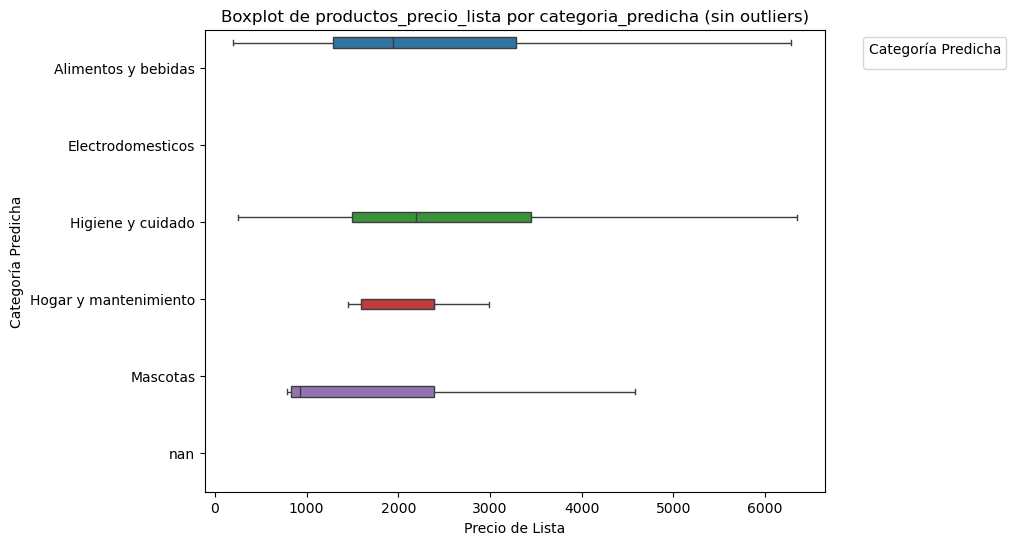

In [27]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=productos_carrefour_df, x='productos_precio_lista', y='categoria_predicha', hue='categoria_predicha', showfliers=False)
plt.title('Boxplot de productos_precio_lista por categoria_predicha (sin outliers)')
plt.xlabel('Precio de Lista')
plt.ylabel('Categoría Predicha')
plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/tmp/ipykernel_272029/1432125022.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')


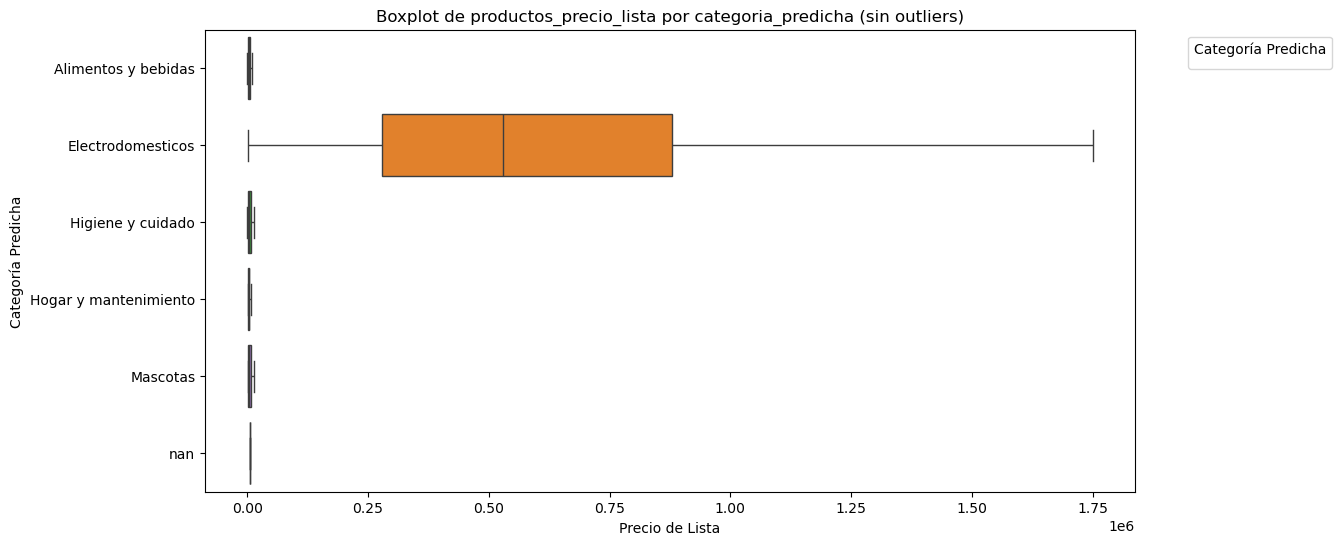

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=productos_otras_marcas_df, x='productos_precio_lista', y='categoria_predicha', hue='categoria_predicha', showfliers=False)
plt.title('Boxplot de productos_precio_lista por categoria_predicha (sin outliers)')
plt.xlabel('Precio de Lista')
plt.ylabel('Categoría Predicha')
plt.legend(title='Categoría Predicha', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

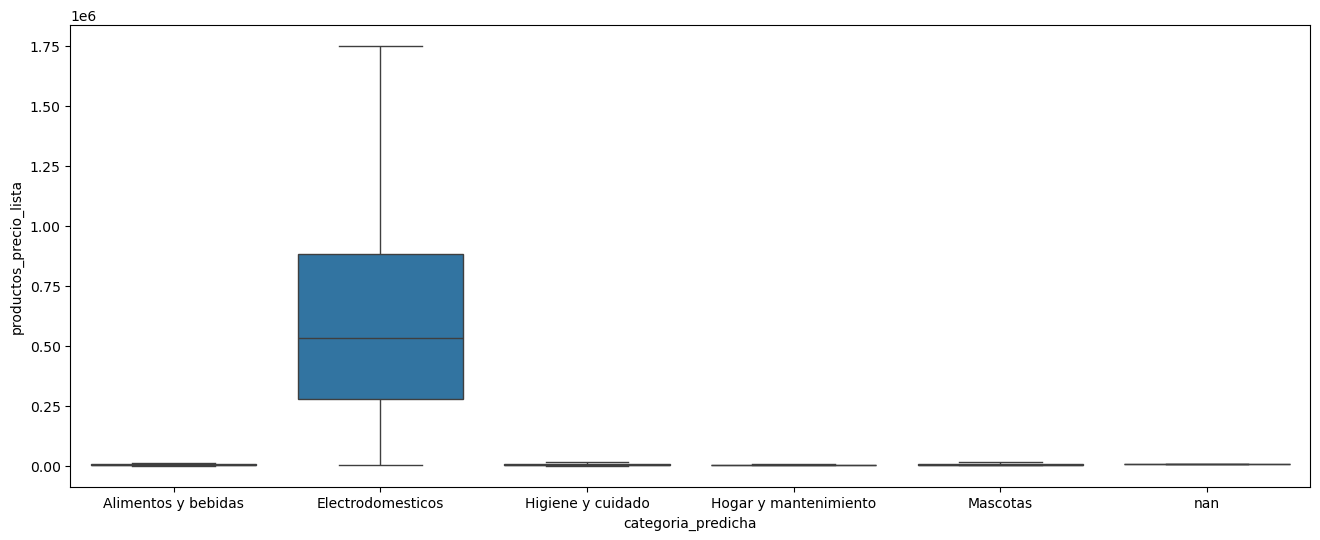

In [33]:
plt.figure(figsize=(16, 6))
sns.boxplot(data=productos_otras_marcas_df, y='productos_precio_lista', x='categoria_predicha', showfliers=False)

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

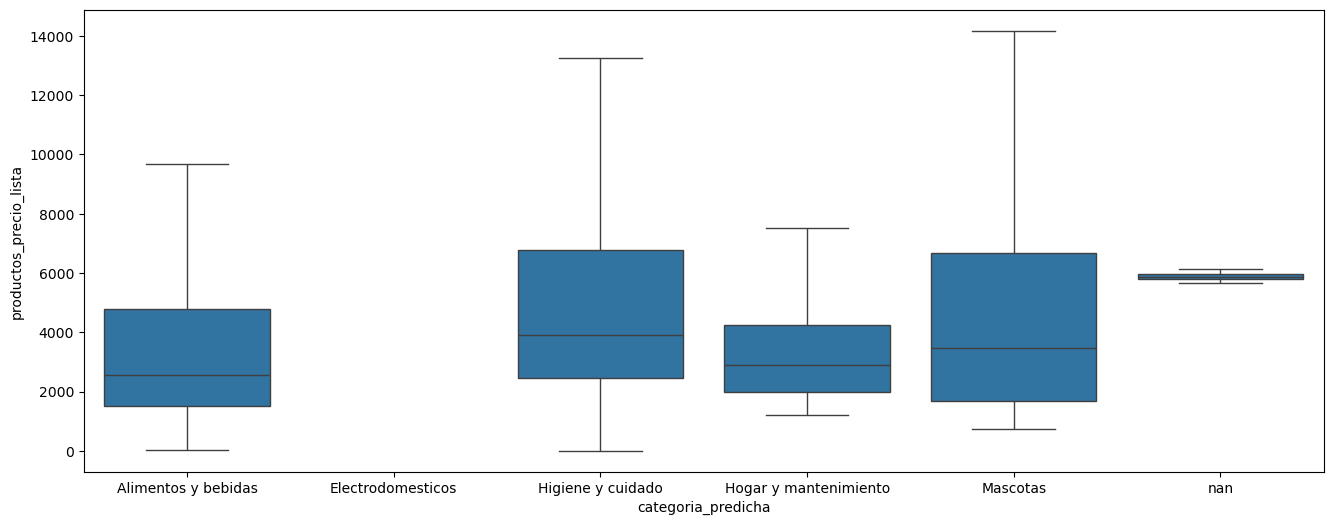

In [28]:
plt.figure(figsize=(16, 6))
filtro = productos_otras_marcas_df[productos_otras_marcas_df['categoria_predicha'] != 'Electrodomesticos']
sns.boxplot(data=filtro, y='productos_precio_lista', x='categoria_predicha', showfliers=False)

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

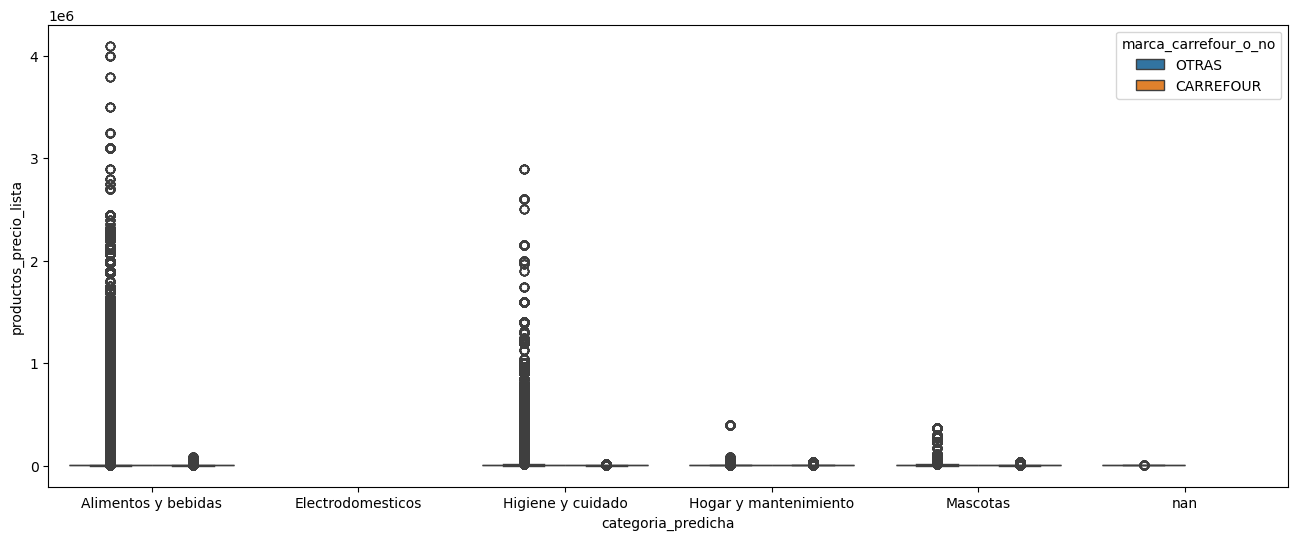

In [34]:
plt.figure(figsize=(16, 6))
filtro = p3_df[p3_df['categoria_predicha'] != 'Electrodomesticos']
sns.boxplot(data=filtro, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no')


<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

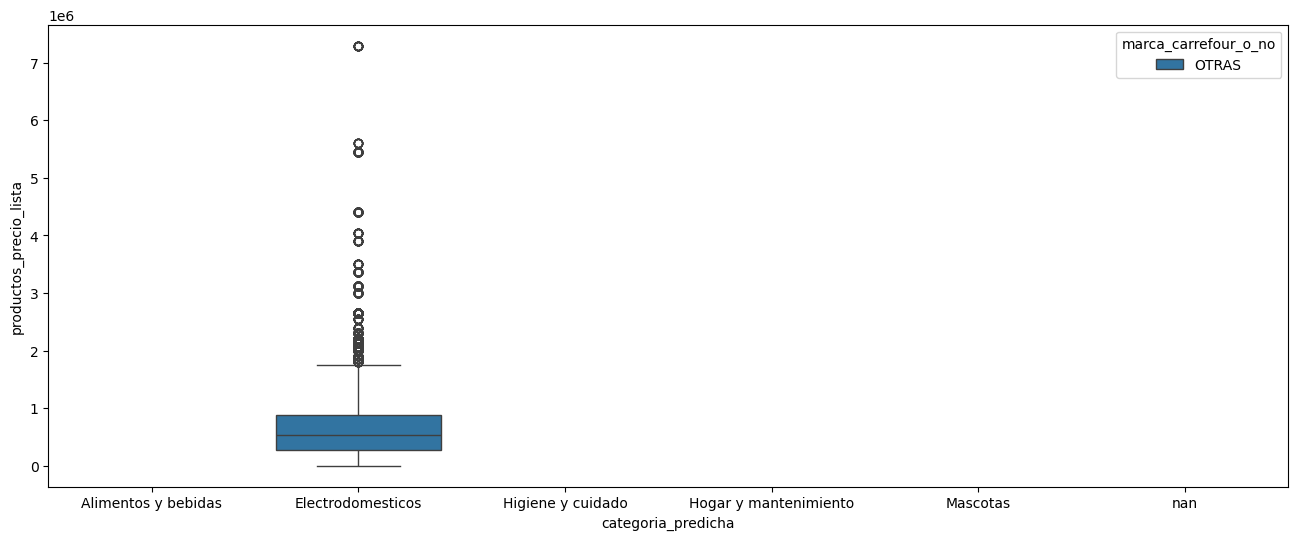

In [33]:
plt.figure(figsize=(16, 6))
filtro = p3_df[p3_df['categoria_predicha'] == 'Electrodomesticos']
sns.boxplot(data=filtro, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no')

<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

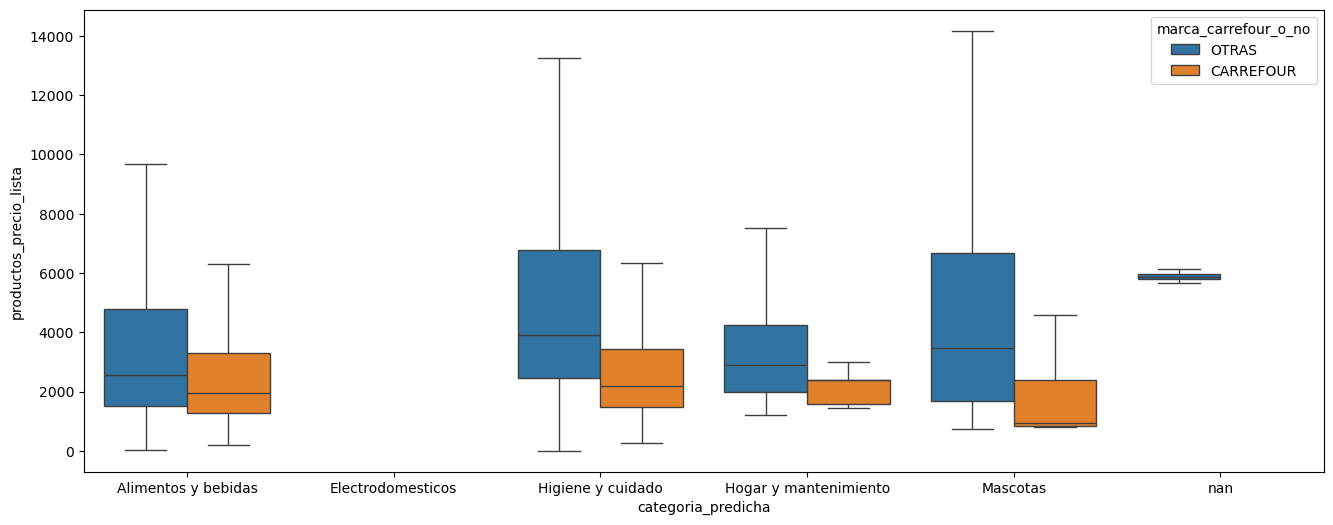

In [31]:
plt.figure(figsize=(16, 6))
filtro = p3_df[p3_df['categoria_predicha'] != 'Electrodomesticos']

sns.boxplot(data=filtro, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no', showfliers=False)


<Axes: xlabel='categoria_predicha', ylabel='productos_precio_lista'>

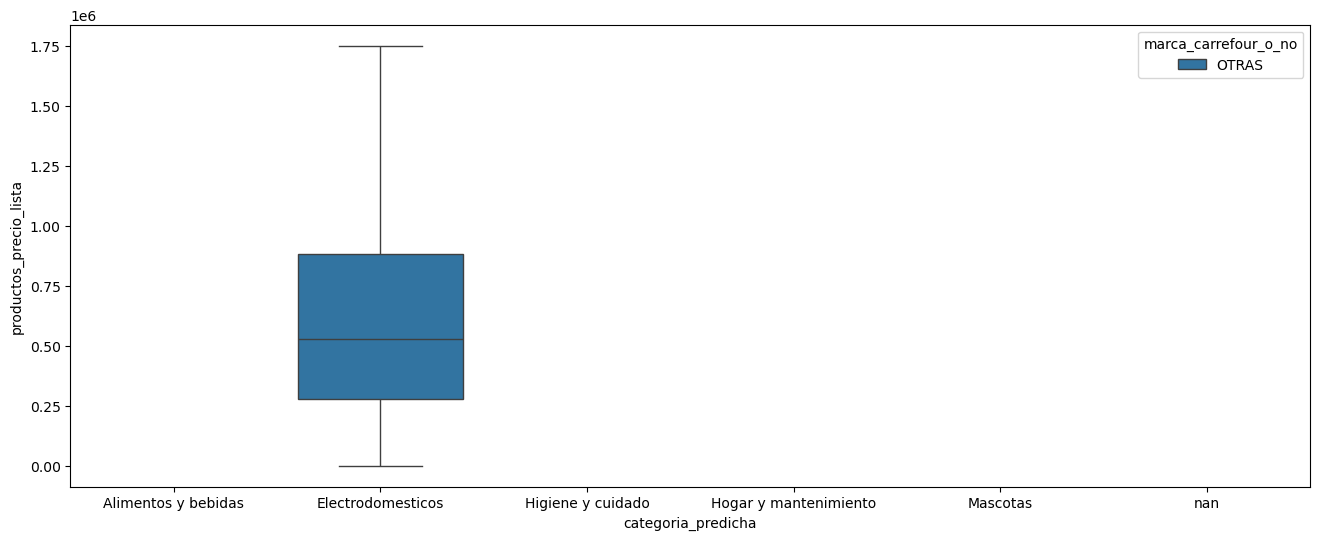

In [32]:
plt.figure(figsize=(16, 6))
filtro = p3_df[p3_df['categoria_predicha'] == 'Electrodomesticos']

sns.boxplot(data=filtro, y='productos_precio_lista', x='categoria_predicha', hue='marca_carrefour_o_no', showfliers=False)

## Reduccion de dimensionalidad

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Selección de columnas numéricas relevantes
cols_num = [
    'productos_precio_lista',     
    'productos_diferencia_precio_fecha_anterior',     
    'sucursal_latitud',     
    'sucursal_longitud',     
]

# 2. Filtrar las columnas, ya no hace falta quitar nulos
df_pca = df_parquet[cols_num].copy()

# 3. Escalar los datos (media 0, desviación 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca)

# 4. Aplicar PCA
pca = PCA(n_components=3)
components = pca.fit_transform(scaled_data)

# 5. Resultado como DataFrame para graficar o analizar
df_components = pd.DataFrame(components, columns=['PC1', 'PC2', 'PC3'])

# Información adicional
df_components['productos_descripcion'] = df_parquet.loc[df_pca.index, 'productos_descripcion'].values
df_components['productos_marca'] = df_parquet.loc[df_pca.index, 'productos_marca'].values
df_components['sucursal_localidad'] = df_parquet.loc[df_pca.index, 'sucursal_localidad'].values
df_components['categoria_predicha'] = df_parquet.loc[df_pca.index, 'categoria_predicha'].values

In [51]:
df_components

PC1       PC2       PC3  \
0        -3.919762 -0.430003 -0.296054   
1         0.373959 -0.099953 -0.046821   
2         1.616642  0.085586  0.072220   
3         0.291627 -0.077831 -0.021401   
4         0.377118 -0.086203 -0.029840   
...            ...       ...       ...   
15557311  0.364979 -0.077151 -0.017276   
15557312  0.305170  0.110124  0.216701   
15557313  0.686219  0.142065  0.085923   
15557314  0.349805 -0.077811 -0.017739   
15557315  0.356572 -0.103272 -0.050367   

                                      productos_descripcion productos_marca  \
0                TOALLA NOSOTRAS CLASICAS C CALENDULA X 16U        NOSOTRAS   
1                FIDEOS DEDALITOS LUCCHETTI BOLSA X 500 GRS       LUCCHETTI   
2               GALLETITAS BOCA DE DAMA TERRABUSI X 170 GRS       TERRABUSI   
3         ACONDICIONADOR LISO EFECTO BOTOX TRESEMME X 25...        TRESEMME   
4                    ANANA EN RODAJAS BULNEZ LATA X 825 GRS          BULNEZ   
...                                                     ...             ...   
15557311         QUESO LA SERENISIMA FINLANDIA POTE 290 GRS       FINLANDIA   
15557312                  WHISKY IMPORTADO J B BOT X 750 CC             J&B   
15557313     GALLETITAS S TACC VAI COLEGIAL SMAMS X 150 GRS           SMAMS   
15557314                   KETCHUP HEINZ DOY PACK X 190 GRS           HEINZ   
15557315  GALLETITAS C CHIPS CHOCO CARREFOUR BOLSA X170 GRS       CARREFOUR   

                       sucursal_localidad   categoria_predicha  
0                              Santa Cruz    Higiene y cuidado  
1         Ciudad Autónoma de Buenos Aires  Alimentos y bebidas  
2                             Resistencia  Alimentos y bebidas  
3                                   Pilar    Higiene y cuidado  
4                           Vicente López  Alimentos y bebidas  
...                                   ...                  ...  
15557311  Ciudad Autónoma de Buenos Aires  Alimentos y bebidas  
15557312                           Zárate  Alimentos y bebidas  
15557313                            Salta  Alimentos y bebidas  
15557314  Ciudad Autónoma de Buenos Aires  Alimentos y bebidas  
15557315  Ciudad Autónoma de Buenos Aires  Alimentos y bebidas  

[15557316 rows x 7 columns]

/tmp/ipykernel_367754/4235922122.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/marck/anaconda3/envs/add-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


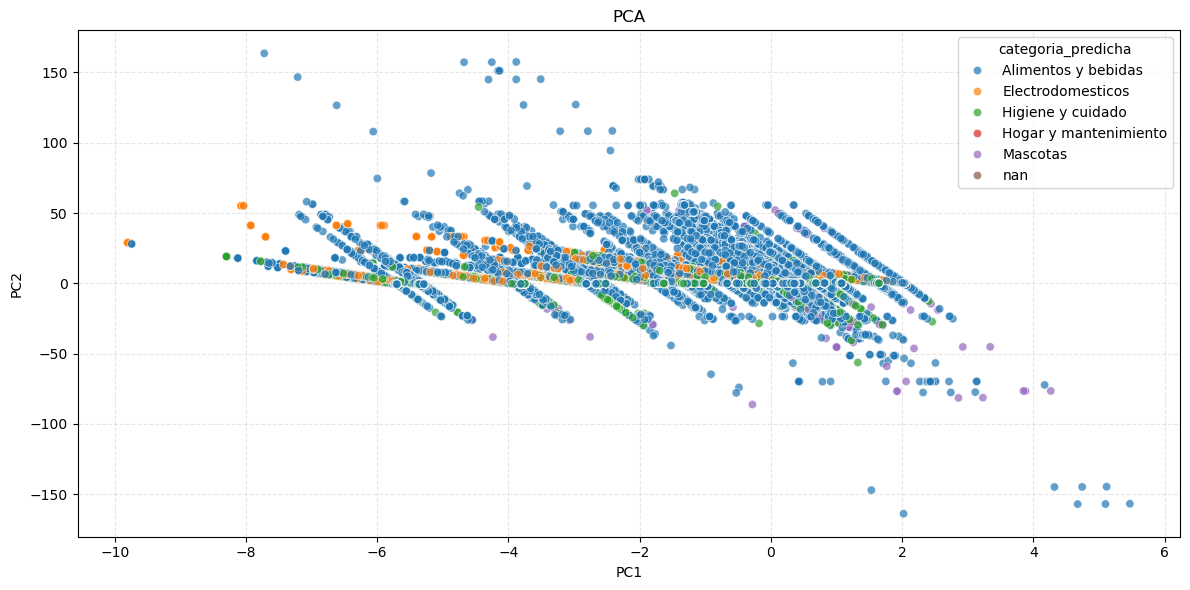

In [52]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_components, x='PC1', y='PC2', hue='categoria_predicha', alpha=0.7)
plt.title('PCA')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


/tmp/ipykernel_367754/2936490779.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/marck/anaconda3/envs/add-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


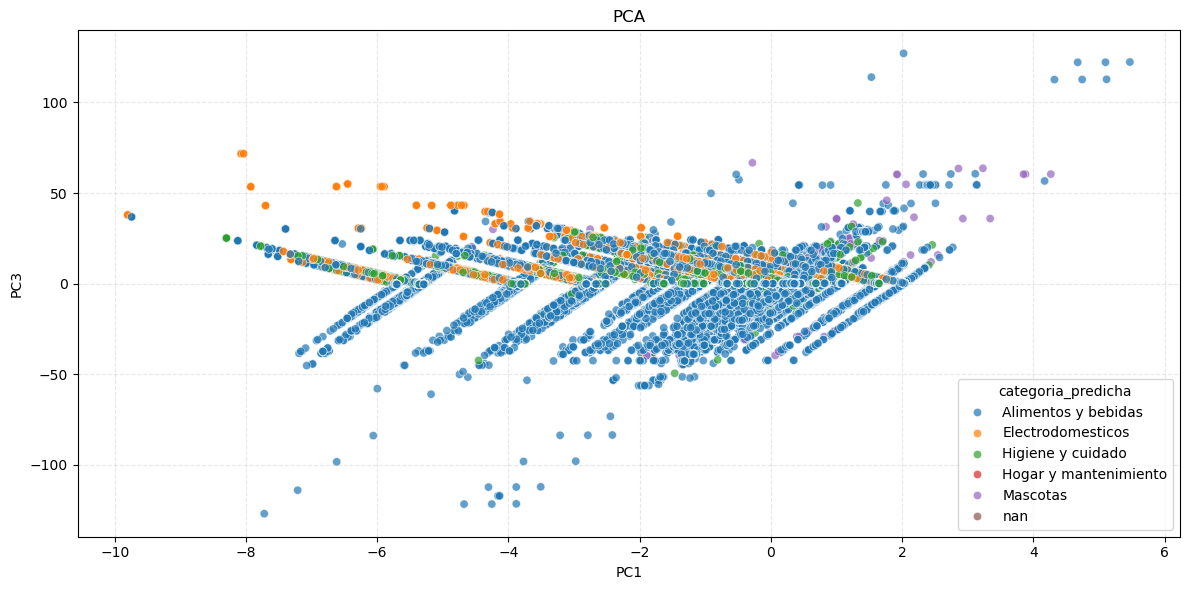

In [57]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_components, x='PC1', y='PC3', hue='categoria_predicha', alpha=0.7)
plt.title('PCA')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_457191/592189211.py:5: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/marck/anaconda3/envs/add-env/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


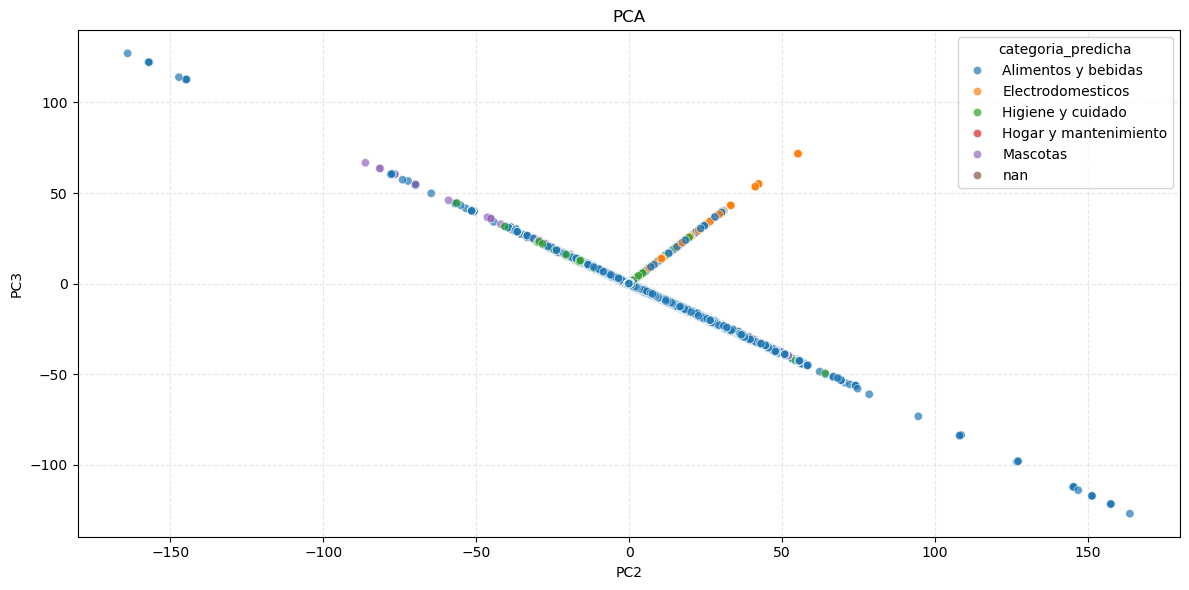

In [9]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_components, x='PC2', y='PC3', hue='categoria_predicha', alpha=0.7)
plt.title('PCA')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [53]:
# varianza explicada por cada componente
explained_var = pca.explained_variance_ratio_
explained_var

array([0.29938902, 0.25037666, 0.24941998])

In [55]:
# varianza acumulada
cumulative_var = np.cumsum(explained_var)
cumulative_var

array([0.29938902, 0.54976568, 0.79918566])

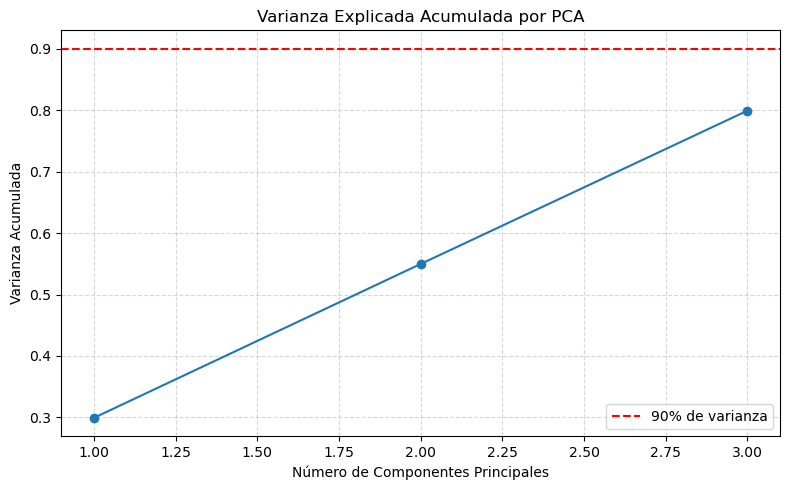

In [56]:
# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_var) + 1), cumulative_var, marker='o', linestyle='-')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.title('Varianza Explicada Acumulada por PCA')
plt.axhline(y=0.9, color='red', linestyle='--', label='90% de varianza')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()
